**Question 1**: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
What metric would you report for this dataset?
What is its value?


## 1-Importing Data and Create a Data Frame

In [397]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [398]:
df=pd.read_csv('data3.csv')


In [399]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,3/13/2017 12:36
1,2,92,925,90,1,cash,3/3/2017 17:38
2,3,44,861,144,1,cash,3/14/2017 4:23
3,4,18,935,156,1,credit_card,3/26/2017 12:43
4,5,18,883,156,1,credit_card,3/1/2017 4:35


## 2- Analysis of Data 

In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


5000 orders without any missing values.

In [401]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


(0.0, 100.0)

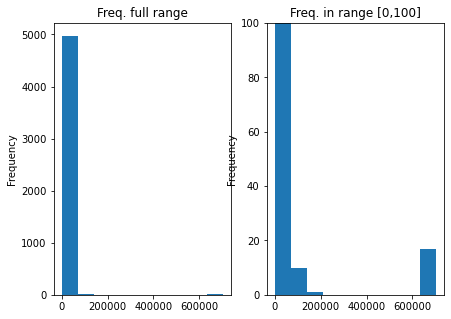

In [402]:
fig = plt.figure(figsize=(7, 5)) 
ax1 = fig.add_subplot(121)
df['order_amount'].plot.hist(ax=ax1,title="Freq. full range")
ax2 = fig.add_subplot(122)
df['order_amount'].plot.hist(ax=ax2,title="Freq. in range [0,100]")
ax2.set_ylim([0, 100])


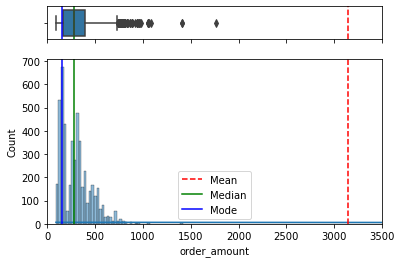

In [252]:
# plot box plot and hist plot for order value less than 3500
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
ax_hist.set_xlim([0, 3500])
mean=df['order_amount'].mean()
median=df['order_amount'].median()
mode=df['order_amount'].mode().values[0]

sns.boxplot(data=df, x=df['order_amount'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x=df['order_amount'], ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

The above picture only shows data in the range of 0 to 3500(around 98% of the data).The mean is realy far from the majority of data. The Median  is located near majority of data.

# 3- Find Outliers:

In [404]:
#Convert "created_at" column date format
df['created_at'] = pd.to_datetime(df['created_at']).dt.date
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13
1,2,92,925,90,1,cash,2017-03-03
2,3,44,861,144,1,cash,2017-03-14
3,4,18,935,156,1,credit_card,2017-03-26
4,5,18,883,156,1,credit_card,2017-03-01


Text(0, 0.5, 'Order Value')

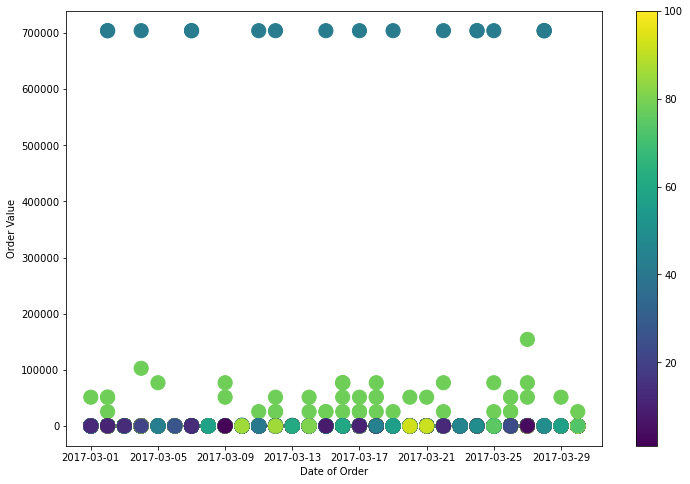

In [405]:
# orde value VS. Date including shop_id color map
plt.figure(figsize=(12, 8))
plt.scatter(x=df['created_at'],y=df['order_amount'],s=200, c=df['shop_id'],cmap='viridis')
plt.colorbar()
plt.xlabel("Date of Order")
plt.ylabel("Order Value")


It seems only two shop Id or two sneaker type created all outliers. Lets digging more on high value Orders:

In [406]:
# order_amount more than 100K
Outlier1_df=df[df["order_amount"]>100000]
Outlier1_df


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07
60,61,42,607,704000,2000,credit_card,2017-03-04
520,521,42,607,704000,2000,credit_card,2017-03-02
691,692,78,878,154350,6,debit,2017-03-27
1104,1105,42,607,704000,2000,credit_card,2017-03-24
1362,1363,42,607,704000,2000,credit_card,2017-03-15
1436,1437,42,607,704000,2000,credit_card,2017-03-11
1562,1563,42,607,704000,2000,credit_card,2017-03-19
1602,1603,42,607,704000,2000,credit_card,2017-03-17
2153,2154,42,607,704000,2000,credit_card,2017-03-12


Below information can be obtained for orders more than 100k:
1. Sneakers with Shop_id(42) and Shop_id(78) created outliers.
2. All orders for Shop_id(42) are equal amount of 704000 and eqaul total_item 2000.
3. Shop_id(78) is a high  value sneakers.
Lets investigate these two shop_id orders:

In [423]:
#Shop_id(42)orders:
shop_id_42=df[df["shop_id"]==42]


In [90]:
shop_id_42.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,51.000000,51.0,51.000000,51.000000,51.000000
mean,2441.921569,42.0,758.588235,235101.490196,667.901961
std,1484.456801,0.0,125.993044,334860.641587,951.308641
min,16.000000,42.0,607.000000,352.000000,1.000000
25%,1366.500000,42.0,607.000000,352.000000,1.000000
50%,2154.000000,42.0,770.000000,704.000000,2.000000
75%,3801.000000,42.0,863.500000,704000.000000,2000.000000
max,4883.000000,42.0,975.000000,704000.000000,2000.000000


In [424]:
#Shop_id(78)orders:
shop_id_78=df[df["shop_id"]==78]


Shop Id(78)  with the sneaker value of 25725 sold orders in quantities of 1 to 3 .

# 4- Total Item 

In [ ]:
Total_item_value=df.groupby(["total_items"])["order_amount"].sum().reset_index(name="Group of Items Total Value")
Total_item_value

In [109]:
Total_item_frequency=df.groupby(["total_items"])["order_amount"].count().reset_index(name="Group of Items Frequency")
Total_item_frequency

,total_items,Group of Items Frequency
0,1,1830
1,2,1832
2,3,941
3,4,293
4,5,77
5,6,9
6,8,1
7,2000,17


the data has Only8 groups of order items that majority of them are below 10.

# 5-Better Metric

As the order amount data is skewed, the mean is not a good representative of the distribution. It is better to consider other statistical parameters like Median. 
The better way to calculate AOV is to group order values base on sneaker values and then calculate mean:


In [429]:
df["sneaker_Value"]=df["order_amount"]/df["total_items"]


Text(0.5, 0, 'Sneaker Price')

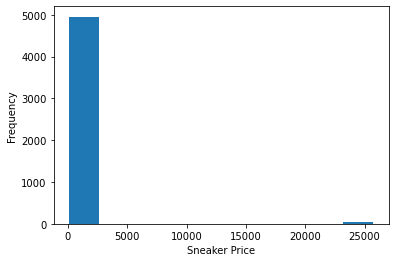

In [430]:
ax = df['sneaker_Value'].plot.hist()
plt.xlabel("Sneaker Price")

In [431]:
df['sneaker_Value'].describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: sneaker_Value, dtype: float64

In [434]:
Total_item_value=df.groupby(["sneaker_Value"])["order_amount"].sum().reset_index(name="Group of Items Total Value")


In [335]:
#Group1:Sneakers with value less than 300
group1_sneaker=df[df["sneaker_Value"].between(0, 300)]
group1_sneaker.describe()

,order_id,shop_id,user_id,order_amount,total_items,Sneaker_Value,sneaker_Value
count,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,2499.584540,49.900877,849.858862,300.155823,1.995717,150.400163,150.400163
std,1444.221163,29.154367,86.887947,155.941112,0.982602,23.851202,23.851202
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000,90.000000
25%,1246.500000,24.000000,776.000000,163.000000,1.000000,132.000000,132.000000
50%,2499.000000,50.000000,850.000000,284.000000,2.000000,153.000000,153.000000
75%,3750.500000,74.000000,925.000000,386.500000,3.000000,166.000000,166.000000
max,5000.000000,100.000000,999.000000,1086.000000,8.000000,201.000000,201.000000


Text(0.5, 1.0, 'Sneaker Value Distribution for less than 300$')

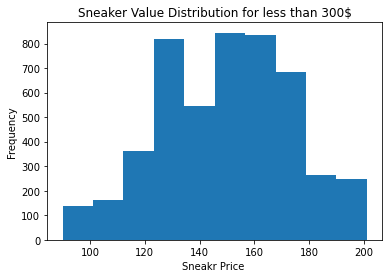

In [418]:
group1_sneaker["sneaker_Value"].plot.hist()
plt.xlabel("Sneakr Price ")
plt.title("Sneaker Value Distribution for less than 300$")

4903 from 5000 sneakers have value less than 300 with AVO of 300 with Std 156.The AVO seems reasonable for this group.

In [336]:
#Group2:Sneakers with value between between 300 and 400
group2_sneaker=df[df["sneaker_Value"].between(300, 400)]
group2_sneaker.describe()

,order_id,shop_id,user_id,order_amount,total_items,Sneaker_Value,sneaker_Value
count,51.000000,51.0,51.000000,51.000000,51.000000,51.0,51.0
mean,2441.921569,42.0,758.588235,235101.490196,667.901961,352.0,352.0
std,1484.456801,0.0,125.993044,334860.641587,951.308641,0.0,0.0
min,16.000000,42.0,607.000000,352.000000,1.000000,352.0,352.0
25%,1366.500000,42.0,607.000000,352.000000,1.000000,352.0,352.0
50%,2154.000000,42.0,770.000000,704.000000,2.000000,352.0,352.0
75%,3801.000000,42.0,863.500000,704000.000000,2000.000000,352.0,352.0
max,4883.000000,42.0,975.000000,704000.000000,2000.000000,352.0,352.0


Group 2 includes only one type of sneaker that sell by shop id 42  with value of 352. In group 2  AOV is 235101.5 and far from the median (704) .This group results ignored as outliers.

In [411]:
#Group3:Sneakers with value  more than 400
group3_sneaker=df[df["sneaker_Value"]>400]
group3_sneaker.describe()

,order_id,shop_id,user_id,order_amount,total_items,sneaker_Value
count,46.000000,46.0,46.000000,46.000000,46.000000,46.0
mean,2663.021739,78.0,867.739130,49213.043478,1.913043,25725.0
std,1338.520020,0.0,81.314871,26472.227449,1.029047,0.0
min,161.000000,78.0,707.000000,25725.000000,1.000000,25725.0
25%,1428.250000,78.0,812.500000,25725.000000,1.000000,25725.0
50%,2796.500000,78.0,866.500000,51450.000000,2.000000,25725.0
75%,3720.250000,78.0,935.750000,51450.000000,2.000000,25725.0
max,4919.000000,78.0,997.000000,154350.000000,6.000000,25725.0


Only one sneaker with value of 25725 in group 3 with AOV of 49213 and std 26472. All group 3 sold by Shop Id(78).The mean and the median are close. So the AOV is 49213.04 for group 3.
 

# 6-Conclusion: 


It is always better to consider other statistical parameters like median and STD in combination with mean to have a better understanding of our data. To calculate AOV I grouped Order values base on sneaker values to 3 groups. Group 1 that includes 98% of orders has sneakers with values of less than 300 with AOV 300.15 which is in a same range of Median and STD. Group 2 includes only shop id 42 orders with AOV of 235101.5 that is far from the median and STD. So, group 2 data ignored as outlier in the final AOV calculation.  Group 3 contains shop id 78 orders with AOV of 49213.04 which is in a reasonable range as Median and STD. 
##### Therefore, for sneakers with low prices AOV is 300.15 and for sneakers with high prices AOV is 49213.04.
